## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  63.139200   558.652444  0.450458  6.544963  1.438997
1  29.777287   457.235901  0.423900  9.528106  1.491869
2  79.982433   454.099335  0.705339  9.036731  1.223559
3  41.058841  1021.978033  0.719746  3.885948  1.496445
4  56.298413  1101.783866  0.673464  9.523663  1.501587


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9736831	total: 68.6ms	remaining: 1m 8s
1:	learn: 0.9656845	total: 69.6ms	remaining: 34.7s
2:	learn: 0.9567193	total: 70.3ms	remaining: 23.4s
3:	learn: 0.9473986	total: 70.9ms	remaining: 17.7s
4:	learn: 0.9395870	total: 71.4ms	remaining: 14.2s
5:	learn: 0.9312886	total: 72ms	remaining: 11.9s
6:	learn: 0.9213707	total: 72.7ms	remaining: 10.3s
7:	learn: 0.9114244	total: 73.2ms	remaining: 9.08s
8:	learn: 0.9017179	total: 73.7ms	remaining: 8.11s
9:	learn: 0.8920920	total: 74.2ms	remaining: 7.35s
10:	learn: 0.8851573	total: 74.8ms	remaining: 6.73s
11:	learn: 0.8764146	total: 75.3ms	remaining: 6.2s
12:	learn: 0.8674879	total: 75.8ms	remaining: 5.76s
13:	learn: 0.8592031	total: 76.4ms	remaining: 5.38s
14:	learn: 0.8520185	total: 76.9ms	remaining: 5.05s
15:	learn: 0.8432550	total: 77.4ms	remaining: 4.76s
16:	learn: 0.8350486	total: 77.8ms	remaining: 4.5s
17:	learn: 0.8283238	total: 78.2ms	remaining: 4.27s
18:	learn: 0.8220477	total: 78.7ms	remaining: 4.

104:	learn: 0.4137715	total: 120ms	remaining: 1.02s
105:	learn: 0.4112650	total: 120ms	remaining: 1.01s
106:	learn: 0.4083982	total: 121ms	remaining: 1.01s
107:	learn: 0.4053668	total: 121ms	remaining: 1s
108:	learn: 0.4026139	total: 122ms	remaining: 994ms
109:	learn: 0.4001998	total: 122ms	remaining: 987ms
110:	learn: 0.3981071	total: 123ms	remaining: 982ms
111:	learn: 0.3950269	total: 123ms	remaining: 976ms
112:	learn: 0.3925170	total: 124ms	remaining: 970ms
113:	learn: 0.3903654	total: 124ms	remaining: 964ms
114:	learn: 0.3879234	total: 124ms	remaining: 958ms
115:	learn: 0.3851768	total: 125ms	remaining: 952ms
116:	learn: 0.3821859	total: 126ms	remaining: 947ms
117:	learn: 0.3798276	total: 126ms	remaining: 941ms
118:	learn: 0.3771926	total: 126ms	remaining: 935ms
119:	learn: 0.3750189	total: 127ms	remaining: 930ms
120:	learn: 0.3724185	total: 127ms	remaining: 924ms
121:	learn: 0.3703805	total: 128ms	remaining: 919ms
122:	learn: 0.3680235	total: 128ms	remaining: 913ms
123:	learn: 0.3

247:	learn: 0.1845017	total: 187ms	remaining: 568ms
248:	learn: 0.1838666	total: 188ms	remaining: 567ms
249:	learn: 0.1830141	total: 188ms	remaining: 565ms
250:	learn: 0.1821484	total: 189ms	remaining: 563ms
251:	learn: 0.1814530	total: 189ms	remaining: 562ms
252:	learn: 0.1806229	total: 190ms	remaining: 560ms
253:	learn: 0.1797310	total: 190ms	remaining: 558ms
254:	learn: 0.1790098	total: 191ms	remaining: 557ms
255:	learn: 0.1785070	total: 191ms	remaining: 555ms
256:	learn: 0.1776484	total: 191ms	remaining: 554ms
257:	learn: 0.1771184	total: 192ms	remaining: 552ms
258:	learn: 0.1762671	total: 192ms	remaining: 550ms
259:	learn: 0.1755990	total: 193ms	remaining: 548ms
260:	learn: 0.1750551	total: 193ms	remaining: 547ms
261:	learn: 0.1743114	total: 194ms	remaining: 546ms
262:	learn: 0.1734705	total: 194ms	remaining: 544ms
263:	learn: 0.1731208	total: 195ms	remaining: 542ms
264:	learn: 0.1725087	total: 195ms	remaining: 541ms
265:	learn: 0.1718424	total: 196ms	remaining: 540ms
266:	learn: 

496:	learn: 0.0915248	total: 303ms	remaining: 306ms
497:	learn: 0.0912436	total: 303ms	remaining: 306ms
498:	learn: 0.0910618	total: 304ms	remaining: 305ms
499:	learn: 0.0909409	total: 305ms	remaining: 305ms
500:	learn: 0.0907231	total: 305ms	remaining: 304ms
501:	learn: 0.0904060	total: 306ms	remaining: 303ms
502:	learn: 0.0902852	total: 306ms	remaining: 302ms
503:	learn: 0.0901316	total: 307ms	remaining: 302ms
504:	learn: 0.0898624	total: 307ms	remaining: 301ms
505:	learn: 0.0896477	total: 307ms	remaining: 300ms
506:	learn: 0.0894364	total: 308ms	remaining: 299ms
507:	learn: 0.0892737	total: 308ms	remaining: 298ms
508:	learn: 0.0889688	total: 309ms	remaining: 298ms
509:	learn: 0.0887092	total: 309ms	remaining: 297ms
510:	learn: 0.0884977	total: 310ms	remaining: 296ms
511:	learn: 0.0883262	total: 310ms	remaining: 295ms
512:	learn: 0.0882043	total: 310ms	remaining: 295ms
513:	learn: 0.0878967	total: 311ms	remaining: 294ms
514:	learn: 0.0876892	total: 311ms	remaining: 293ms
515:	learn: 

639:	learn: 0.0638949	total: 370ms	remaining: 208ms
640:	learn: 0.0638652	total: 371ms	remaining: 208ms
641:	learn: 0.0637645	total: 371ms	remaining: 207ms
642:	learn: 0.0637352	total: 372ms	remaining: 206ms
643:	learn: 0.0636795	total: 372ms	remaining: 206ms
644:	learn: 0.0635798	total: 373ms	remaining: 205ms
645:	learn: 0.0635508	total: 373ms	remaining: 204ms
646:	learn: 0.0634527	total: 373ms	remaining: 204ms
647:	learn: 0.0634241	total: 374ms	remaining: 203ms
648:	learn: 0.0633473	total: 374ms	remaining: 202ms
649:	learn: 0.0632500	total: 375ms	remaining: 202ms
650:	learn: 0.0632218	total: 375ms	remaining: 201ms
651:	learn: 0.0629053	total: 376ms	remaining: 200ms
652:	learn: 0.0628097	total: 376ms	remaining: 200ms
653:	learn: 0.0627150	total: 377ms	remaining: 199ms
654:	learn: 0.0626871	total: 377ms	remaining: 199ms
655:	learn: 0.0626596	total: 377ms	remaining: 198ms
656:	learn: 0.0625662	total: 378ms	remaining: 197ms
657:	learn: 0.0625390	total: 378ms	remaining: 197ms
658:	learn: 

889:	learn: 0.0386818	total: 485ms	remaining: 60ms
890:	learn: 0.0386057	total: 486ms	remaining: 59.4ms
891:	learn: 0.0385890	total: 486ms	remaining: 58.9ms
892:	learn: 0.0385141	total: 486ms	remaining: 58.3ms
893:	learn: 0.0383956	total: 487ms	remaining: 57.7ms
894:	learn: 0.0383705	total: 487ms	remaining: 57.2ms
895:	learn: 0.0383541	total: 488ms	remaining: 56.6ms
896:	learn: 0.0382050	total: 488ms	remaining: 56.1ms
897:	learn: 0.0381734	total: 489ms	remaining: 55.5ms
898:	learn: 0.0380015	total: 489ms	remaining: 55ms
899:	learn: 0.0379769	total: 490ms	remaining: 54.4ms
900:	learn: 0.0379565	total: 490ms	remaining: 53.9ms
901:	learn: 0.0379258	total: 491ms	remaining: 53.3ms
902:	learn: 0.0379098	total: 491ms	remaining: 52.8ms
903:	learn: 0.0378365	total: 492ms	remaining: 52.2ms
904:	learn: 0.0378207	total: 492ms	remaining: 51.7ms
905:	learn: 0.0377906	total: 493ms	remaining: 51.1ms
906:	learn: 0.0376434	total: 493ms	remaining: 50.6ms
907:	learn: 0.0375710	total: 493ms	remaining: 50ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


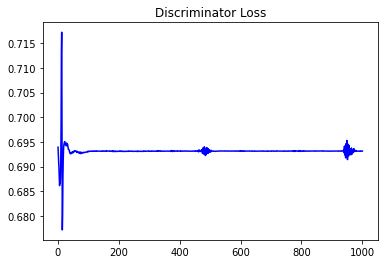

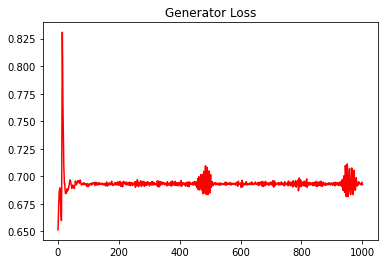

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2899904333375074


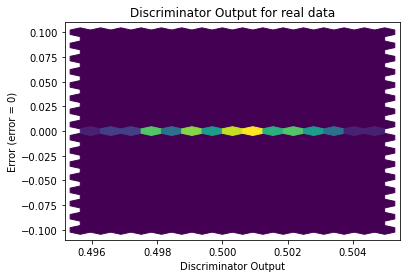

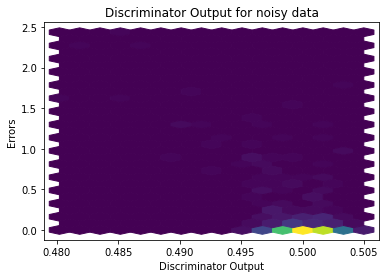

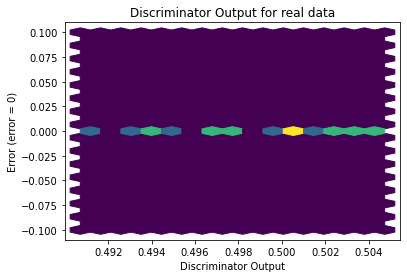

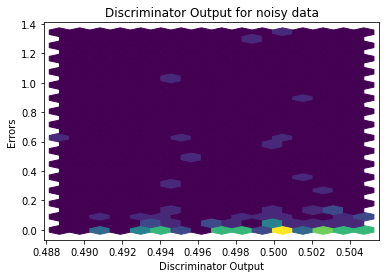

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6015]], requires_grad=True)
